<a href="https://colab.research.google.com/github/igornunespatricio/Python-Course/blob/main/Data%20Analysis/Matplotlib/Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

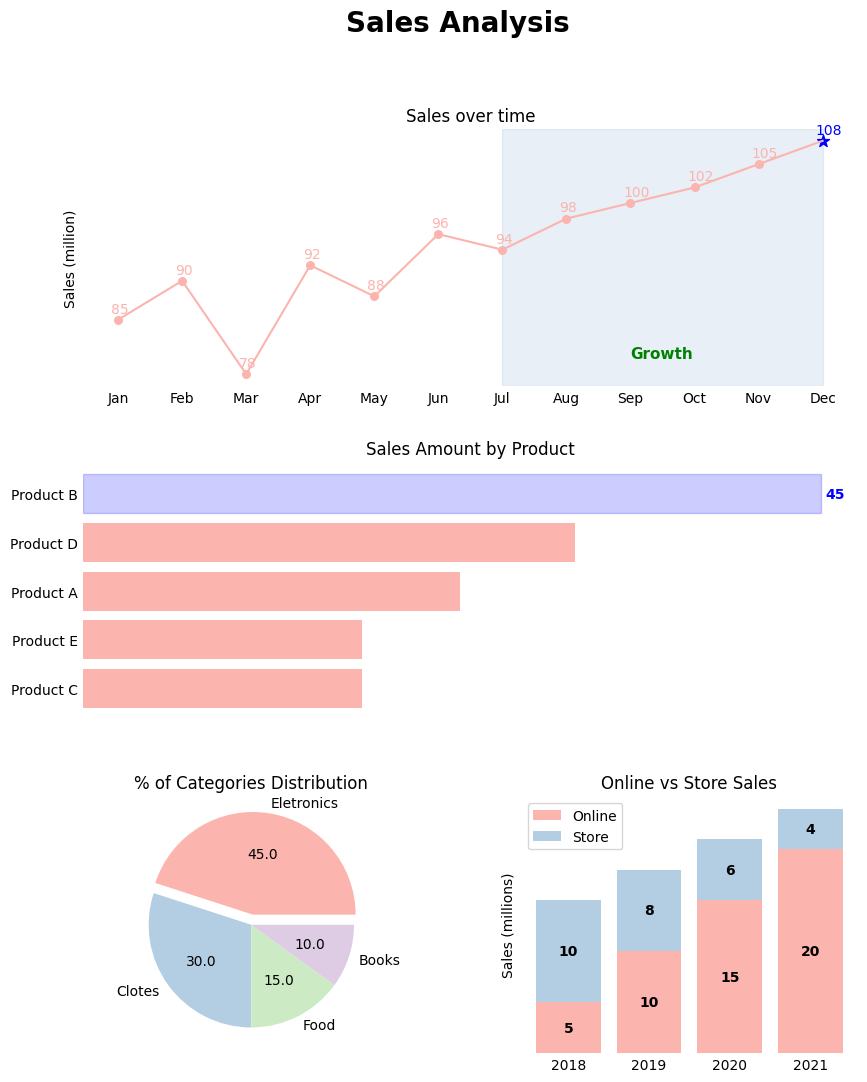

In [21]:
mosaic = 'AA;BB;CD'
spacing = {
    'wspace': 0.3,
    'hspace': 0.3
}
fig = plt.figure(figsize=(10,12))
axs = fig.subplot_mosaic(mosaic, gridspec_kw=spacing)
colors = plt.get_cmap('Pastel1').colors
colors_cycle = cycler('color', colors)
plt.rc('axes', prop_cycle=colors_cycle)
attention_color = 'blue'


# -----------------------------
# chart 1
# -----------------------------

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sales = [85, 90, 78, 92, 88, 96, 94, 98, 100, 102, 105, 108]
axs['A'].plot(months, sales)

axs['A'].axvspan(6, 11, color=colors[1], alpha=0.30)  # highlight sales from July to December
axs['A'].text(8, 80, 'Growth', fontsize=11, color='green', weight='bold') # write text 'Growth' to position in chart

markers = np.where(sales==np.max(sales), '*', 'o')  # mark * for max value and o for other values
for position, marker in enumerate(markers):
    if marker == '*':
        color = attention_color
        size = 80
    else:
        color=colors[0]
        size=30
    axs['A'].scatter(months[position], sales[position], marker=marker, s=size, color=color)
    axs['A'].annotate(sales[position], color=color, xy=(months[position], sales[position]), xytext=(-5,5), textcoords='offset points')

axs['A'].set_ylabel('Sales (million)')
axs['A'].set_title('Sales over time')

axs['A'].set_yticks([])
axs['A'].tick_params(axis='x', length=0)
axs['A'].set_frame_on(False)

# -----------------------------
# chart 2
# -----------------------------

products = [f'Product {item}' for item in ['A', 'B', 'C', 'D', 'E']]
amount = [23, 45, 17, 30, 17]
ordered_data = sorted(zip(amount, products))  # sort by first in tuple, in this case 'amount'
ordered_products = [item[1] for item in ordered_data]
ordered_amount = [item[0] for item in ordered_data]

bars = axs['B'].barh(ordered_products, ordered_amount)
bar_labels = np.where(ordered_amount==np.max(ordered_amount), ordered_amount, '')
axs['B'].bar_label(bars,labels=bar_labels, padding=3, fontsize=10, fontweight='bold', color=attention_color)

axs['B'].set_frame_on(False)
axs['B'].set_xticks([])
axs['B'].tick_params(axis='y', length=0)

for i, bar in enumerate(bars):
    if bar.get_width() == max(amount):
        bar.set_color(attention_color)
        bar.set_alpha(0.2)

axs['B'].set_title('Sales Amount by Product')

# -----------------------------
# chart 3
# -----------------------------

categories = ['Eletronics', 'Clotes', 'Food', 'Books']
amount = [45, 30, 15, 10]
expand = [0.1, 0, 0, 0]

axs['C'].pie(amount, labels=categories, colors=colors, autopct='%.1f', explode=expand)
axs['C'].set_title('% of Categories Distribution')

# -----------------------------
# chart 4
# -----------------------------

years = [2018, 2019, 2020, 2021]
online_sales = [5, 10, 15, 20]
store_sales = [10, 8, 6, 4]

online_sales_bar = axs['D'].bar(years, online_sales, label='Online')
store_sales_bar = axs['D'].bar(years, store_sales, bottom=online_sales, label='Store')
axs['D'].bar_label(online_sales_bar, labels=online_sales, fontsize=10, fontweight='bold', label_type='center')
axs['D'].bar_label(store_sales_bar, labels=store_sales, fontsize=10, fontweight='bold', label_type='center')

axs['D'].set_xticks(ticks=years)
axs['D'].set_yticks([])
axs['D'].tick_params(axis='x', length=0)
axs['D'].set_frame_on(False)
axs['D'].set_ylabel('Sales (millions)')
axs['D'].set_title('Online vs Store Sales')

axs['D'].legend()

fig.suptitle('Sales Analysis', fontweight='bold', fontsize=20)

plt.show()